# AI-Powered Alternative Credit Scoring System


## 1. Configuration & Setup


In [15]:
# =========================
# CONFIGURATION
# =========================

RANDOM_STATE = 42
TEST_SIZE = 0.2

TARGET_COL = None

DATA_PATH = "data/credit.csv"


In [10]:
# =========================
# IMPORTS
# =========================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

from imblearn.over_sampling import SMOTE

import xgboost as xgb
import shap
import joblib

import warnings
warnings.filterwarnings("ignore")


In [ ]:
!       pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap imbalanced-learn joblib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# =========================
# IMPORTS
# =========================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

from imblearn.over_sampling import SMOTE

import xgboost as xgb
import shap
import joblib

import warnings
warnings.filterwarnings("ignore")


C:\Users\Lenovo\AppData\Roaming\Python\Python314\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# =========================
# DATA LOADING
# =========================

import pandas as pd

df = pd.read_csv("data/credit.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1000, 10)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
# =========================
# CHECK COLUMNS & TARGET
# =========================

print("Columns:")
print(df.columns)

print("\nMissing values per column:")
print(df.isnull().sum())


Columns:
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='str')

Missing values per column:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [4]:
# Reload dataset
df = pd.read_csv("data/credit.csv")

# Check columns
print(df.columns)

# Show first rows
df.head()


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='str')


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
df = pd.read_csv("data/credit.csv")

print(df.columns)
df.head()


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='str')


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
# Load Give Me Some Credit dataset
df = pd.read_csv("data/credit.csv")

print("Shape:", df.shape)
print(df.columns)
df.head()


Shape: (150000, 12)
Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='str')


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
# =========================
# BASIC CLEANING - PART 1
# =========================

# Drop useless index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check target balance
print("\nTarget distribution:")
print(df['SeriousDlqin2yrs'].value_counts(normalize=True))


Missing values per column:
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Target distribution:
SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64


In [8]:
# =========================
# HANDLE MISSING VALUES
# =========================

# Fill MonthlyIncome with median
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

# Fill NumberOfDependents with median
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

# Confirm no missing values remain
print("Remaining missing values:")
print(df.isnull().sum())


Remaining missing values:
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [9]:
# =========================
# HANDLE MISSING VALUES - FIX
# =========================

# Check before
print("Before filling:")
print(df[['MonthlyIncome','NumberOfDependents']].isnull().sum())

# Fill missing values
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())

# Check after
print("\nAfter filling:")
print(df[['MonthlyIncome','NumberOfDependents']].isnull().sum())


Before filling:
MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

After filling:
MonthlyIncome         0
NumberOfDependents    0
dtype: int64


In [10]:
# =========================
# OUTLIER HANDLING
# =========================

# Check extreme values before
print("Max RevolvingUtilization:", df['RevolvingUtilizationOfUnsecuredLines'].max())
print("Max DebtRatio:", df['DebtRatio'].max())

# Clip extreme values
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].clip(upper=5)
df['DebtRatio'] = df['DebtRatio'].clip(upper=5)

# Check after clipping
print("\nAfter Clipping:")
print("Max RevolvingUtilization:", df['RevolvingUtilizationOfUnsecuredLines'].max())
print("Max DebtRatio:", df['DebtRatio'].max())


Max RevolvingUtilization: 50708.0
Max DebtRatio: 329664.0

After Clipping:
Max RevolvingUtilization: 5.0
Max DebtRatio: 5.0


In [11]:
# =========================
# FEATURE ENGINEERING
# =========================

# Income to debt ratio (ability to repay)
df['income_to_debt'] = df['MonthlyIncome'] / (df['DebtRatio'] + 1)

# Late payment frequency
df['late_payment_ratio'] = (
    df['NumberOfTimes90DaysLate'] /
    (df['NumberOfTime30-59DaysPastDueNotWorse'] + 1)
)

# Credit stability score
df['credit_stability'] = (
    df['age'] / (df['NumberOfOpenCreditLinesAndLoans'] + 1)
)

# Overall risk index
df['risk_index'] = (
    df['DebtRatio'] *
    df['NumberOfTimes90DaysLate']
)

# Check new columns
print("New features added:")
print(df[['income_to_debt','late_payment_ratio','credit_stability','risk_index']].head())


New features added:
   income_to_debt  late_payment_ratio  credit_stability  risk_index
0     5058.286410                 0.0          3.214286    0.000000
1     2317.546266                 0.0          8.000000    0.000000
2     2803.393701                 0.5         12.666667    0.085113
3     3185.175438                 0.0          5.000000    0.000000
4    62041.570731                 0.0          6.125000    0.000000


In [12]:
# =========================
# PREPARE FEATURES & TARGET
# =========================

# Define target
TARGET_COL = 'SeriousDlqin2yrs'

# Separate X and y
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (150000, 14)
Target shape: (150000,)


In [16]:
# =========================
# TRAIN-TEST SPLIT
# =========================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# Check distribution
print("\nTrain target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))


Training set: (120000, 14) (120000,)
Test set: (30000, 14) (30000,)

Train target distribution:
SeriousDlqin2yrs
0    0.933158
1    0.066842
Name: proportion, dtype: float64

Test target distribution:
SeriousDlqin2yrs
0    0.933167
1    0.066833
Name: proportion, dtype: float64


In [17]:
# =========================
# HANDLE CLASS IMBALANCE (SMOTE)
# =========================

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=RANDOM_STATE)

X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_bal.value_counts())


Before SMOTE: SeriousDlqin2yrs
0    111979
1      8021
Name: count, dtype: int64

After SMOTE: SeriousDlqin2yrs
0    111979
1    111979
Name: count, dtype: int64


In [18]:
# =========================
# BASELINE MODEL - LOGISTIC REGRESSION
# =========================

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale features (important for LR)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)

lr_model.fit(X_train_scaled, y_train_bal)

print("Logistic Regression trained successfully.")


Logistic Regression trained successfully.


In [19]:
# =========================
# EVALUATE LOGISTIC REGRESSION
# =========================

from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Report
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# AUC Score
auc_lr = roc_auc_score(y_test, y_proba_lr)
print("AUC-ROC:", auc_lr)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     27995
           1       0.21      0.74      0.32      2005

    accuracy                           0.79     30000
   macro avg       0.59      0.77      0.60     30000
weighted avg       0.93      0.79      0.84     30000

AUC-ROC: 0.8499201451630791


In [20]:
# =========================
# MAIN MODEL - XGBOOST
# =========================

import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=RANDOM_STATE
)

# Train on balanced data
xgb_model.fit(X_train_bal, y_train_bal)

print("XGBoost trained successfully.")


XGBoost trained successfully.


In [21]:
# =========================
# EVALUATE XGBOOST MODEL
# =========================

from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# AUC Score
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("AUC-ROC:", auc_xgb)


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     27995
           1       0.33      0.41      0.36      2005

    accuracy                           0.90     30000
   macro avg       0.64      0.67      0.66     30000
weighted avg       0.91      0.90      0.91     30000

AUC-ROC: 0.8343921763727848


In [22]:
# =========================
# TUNED XGBOOST (IMPROVE RECALL)
# =========================

# Calculate class weight
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

print("scale_pos_weight:", scale_pos_weight)

xgb_tuned = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=RANDOM_STATE
)

xgb_tuned.fit(X_train, y_train)

print("Tuned XGBoost trained.")


scale_pos_weight: 13.960728088766986
Tuned XGBoost trained.


In [23]:
# =========================
# EVALUATE TUNED XGBOOST
# =========================

from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred_tuned = xgb_tuned.predict(X_test)
y_proba_tuned = xgb_tuned.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report (Tuned XGBoost):")
print(classification_report(y_test, y_pred_tuned))

# AUC Score
auc_tuned = roc_auc_score(y_test, y_proba_tuned)
print("AUC-ROC:", auc_tuned)


Classification Report (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     27995
           1       0.22      0.75      0.35      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.78      0.62     30000
weighted avg       0.93      0.81      0.85     30000

AUC-ROC: 0.8658081533084595


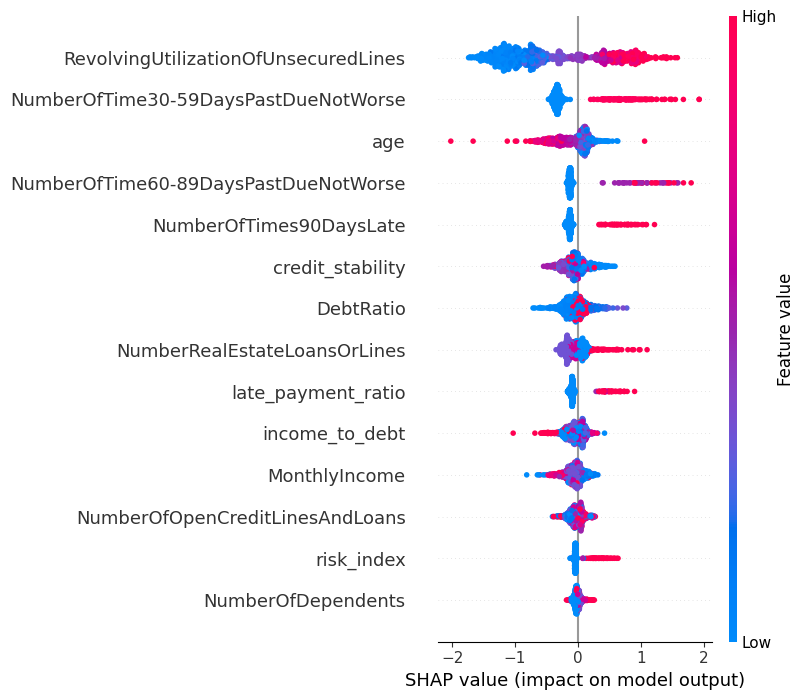

In [24]:
# =========================
# SHAP EXPLAINABILITY
# =========================

import shap

# Create explainer
explainer = shap.TreeExplainer(xgb_tuned)

# Compute SHAP values (use small sample for speed)
X_sample = X_test.sample(1000, random_state=RANDOM_STATE)

shap_values = explainer.shap_values(X_sample)

# Global feature importance
shap.summary_plot(shap_values, X_sample)


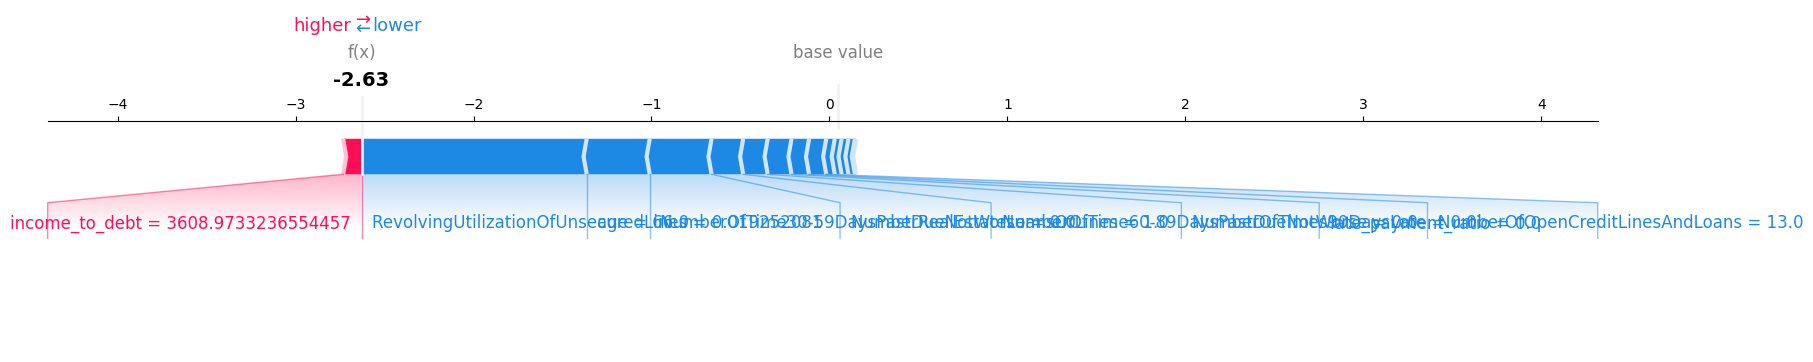

In [25]:
# =========================
# SHAP LOCAL EXPLANATION
# =========================

# Pick one customer from test set
sample_index = 0

sample_data = X_test.iloc[sample_index:sample_index+1]

# Calculate SHAP values
shap_value_single = explainer.shap_values(sample_data)

# Plot explanation
shap.force_plot(
    explainer.expected_value,
    shap_value_single,
    sample_data,
    matplotlib=True
)


In [26]:
# =========================
# FAIRNESS AUDIT (INCOME GROUP)
# =========================

# Create income groups
df_test = X_test.copy()
df_test['target'] = y_test.values
df_test['pred'] = y_pred_tuned

df_test['income_group'] = pd.qcut(
    df_test['MonthlyIncome'],
    q=4,
    labels=['Low','Mid-Low','Mid-High','High']
)

# Approval rate per group
fairness = df_test.groupby('income_group')['pred'].mean()

print("Default prediction rate by income group:")
print(fairness)


Default prediction rate by income group:
income_group
Low         0.308492
Mid-Low     0.220416
Mid-High    0.198617
High        0.157395
Name: pred, dtype: float64


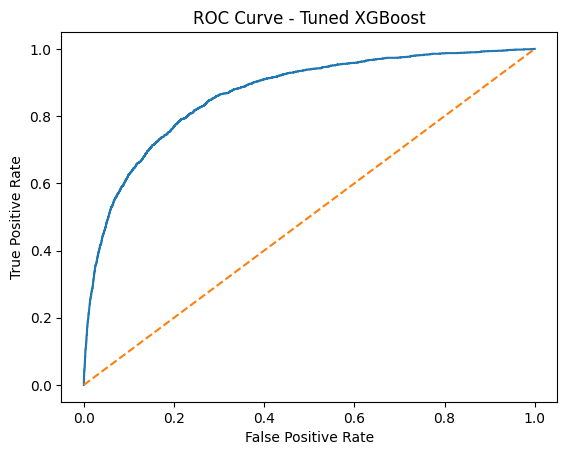

In [27]:
# =========================
# ROC CURVE
# =========================

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_tuned)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost")
plt.show()


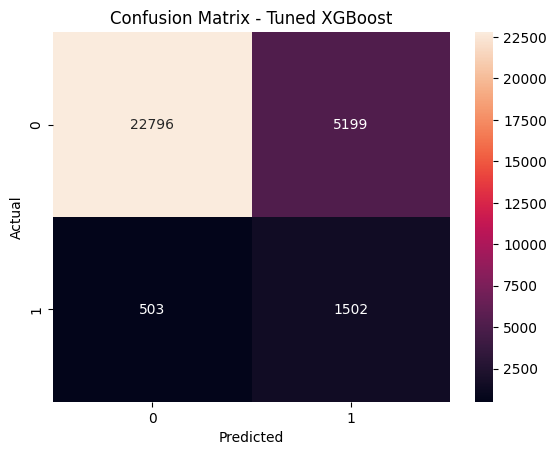

In [28]:
# =========================
# CONFUSION MATRIX
# =========================

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()


In [29]:
import joblib

joblib.dump(xgb_tuned, "final_credit_model.pkl")


['final_credit_model.pkl']

In [2]:
# =========================
# AI CREDIT COACH - LOAD MODEL
# =========================

import joblib

# Load trained model
credit_model = joblib.load("final_credit_model.pkl")

print("Model loaded successfully.")


Model loaded successfully.


In [3]:
# =========================
# AI CREDIT COACH - PREDICT FUNCTION
# =========================

def predict_risk(customer_dict):
    """
    Takes customer input dictionary
    Returns prediction and probability
    """
    customer_df = pd.DataFrame([customer_dict])
    
    prediction = credit_model.predict(customer_df)[0]
    probability = credit_model.predict_proba(customer_df)[0][1]
    
    return prediction, probability


In [4]:
# =========================
# AI CREDIT COACH - TOP RISK DRIVERS
# =========================

import shap

# Create SHAP explainer (use tuned model)
coach_explainer = shap.TreeExplainer(credit_model)


def get_top_risk_factors(customer_dict, top_n=3):
    """
    Returns top N features increasing default risk
    """
    
    customer_df = pd.DataFrame([customer_dict])
    
    # Calculate SHAP values
    shap_values = coach_explainer.shap_values(customer_df)
    
    # Get absolute importance
    shap_series = pd.Series(
        shap_values[0],
        index=customer_df.columns
    )
    
    # Sort by highest impact
    top_features = shap_series.sort_values(ascending=False).head(top_n)
    
    return top_features


C:\Users\Lenovo\AppData\Roaming\Python\Python314\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# =========================
# AI CREDIT COACH - ADVICE ENGINE
# =========================

def generate_advice(top_features):
    """
    Converts top risk features into human advice
    """
    
    advice_map = {
        'DebtRatio': "Reduce your debt by paying off outstanding loans.",
        'RevolvingUtilizationOfUnsecuredLines': "Lower your credit card usage below 30%.",
        'NumberOfTimes90DaysLate': "Avoid missing payments for the next 6 months.",
        'NumberOfTime30-59DaysPastDueNotWorse': "Maintain timely repayments.",
        'NumberOfTime60-89DaysPastDueNotWorse': "Clear overdue balances.",
        'MonthlyIncome': "Increase or stabilize your monthly income.",
        'income_to_debt': "Improve income-to-debt ratio.",
        'credit_stability': "Maintain stable credit activity.",
        'risk_index': "Reduce combined debt and late payments."
    }
    
    advice_list = []
    
    for feature in top_features.index:
        if feature in advice_map:
            advice_list.append(advice_map[feature])
        else:
            advice_list.append(f"Improve your {feature} score.")
    
    return advice_list


In [7]:
# =========================
# AI CREDIT COACH - MAIN FUNCTION
# =========================

def ai_credit_coach(customer_dict):
    """
    Full AI coaching system
    """
    
    # Step 1: Predict risk
    prediction, probability = predict_risk(customer_dict)
    
    print("Default Probability:", round(probability, 3))
    
    if prediction == 0:
        print("Decision: LOW RISK - Likely Approved")
        return
    
    print("Decision: HIGH RISK - Improvement Suggested")
    
    # Step 2: Get top risk drivers
    top_features = get_top_risk_factors(customer_dict)
    
    print("\nTop Risk Factors:")
    print(top_features)
    
    # Step 3: Generate advice
    advice = generate_advice(top_features)
    
    print("\nRecommended Improvements:")
    for i, tip in enumerate(advice, 1):
        print(f"{i}. {tip}")


In [11]:
# =========================
# TEST AI CREDIT COACH
# =========================

risky_customer = {
    'RevolvingUtilizationOfUnsecuredLines': 0.9,
    'age': 30,
    'NumberOfTime30-59DaysPastDueNotWorse': 3,
    'DebtRatio': 0.9,
    'MonthlyIncome': 15000,
    'NumberOfOpenCreditLinesAndLoans': 2,
    'NumberOfTimes90DaysLate': 2,
    'NumberRealEstateLoansOrLines': 0,
    'NumberOfTime60-89DaysPastDueNotWorse': 1,
    'NumberOfDependents': 3,
    
    # Engineered features
    'income_to_debt': 15000 / (0.9 + 1),
    'late_payment_ratio': 2 / (3 + 1),
    'credit_stability': 30 / (2 + 1),
    'risk_index': 0.9 * 2
}

ai_credit_coach(risky_customer)


Default Probability: 0.941
Decision: HIGH RISK - Improvement Suggested

Top Risk Factors:
NumberOfTime60-89DaysPastDueNotWorse    0.624994
NumberOfTime30-59DaysPastDueNotWorse    0.601136
NumberOfTimes90DaysLate                 0.596547
dtype: float32

Recommended Improvements:
1. Clear overdue balances.
2. Maintain timely repayments.
3. Avoid missing payments for the next 6 months.
